# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

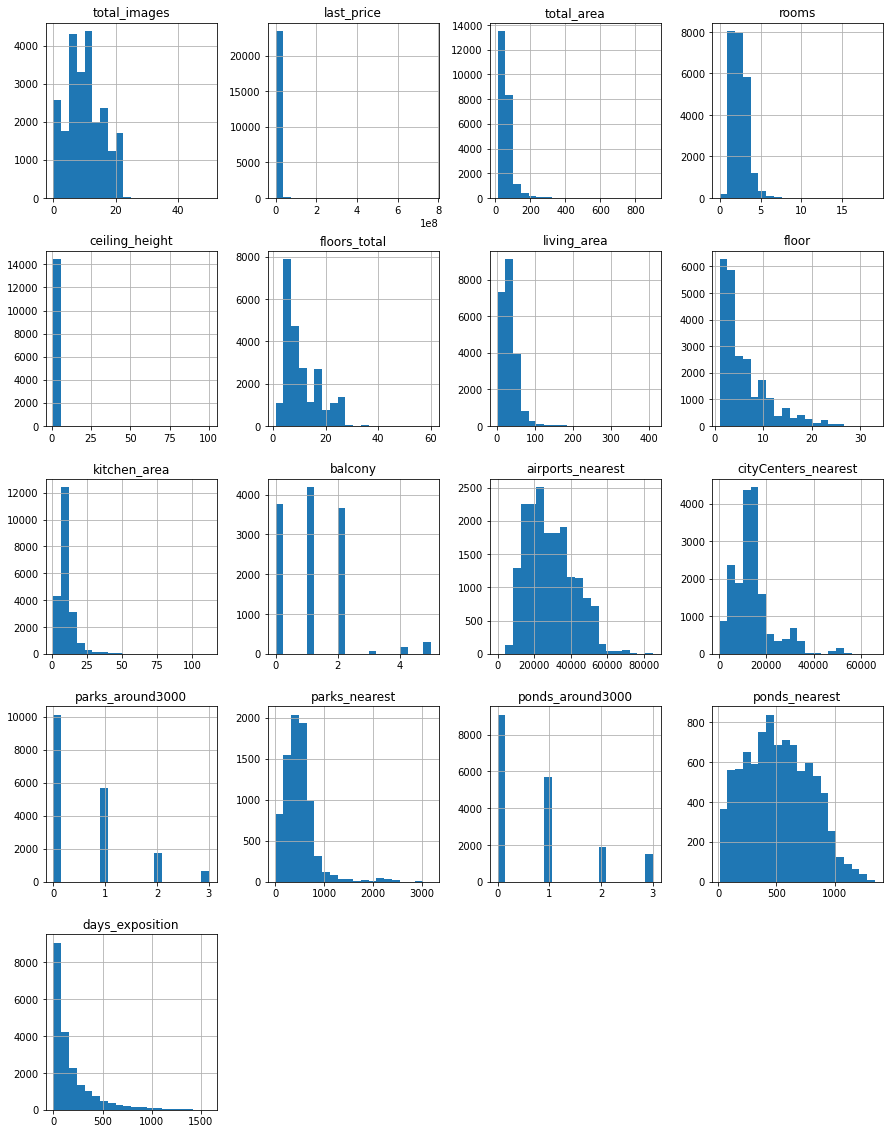

In [4]:
data.hist(figsize=(15, 20), bins=20)
plt.show()

### Выполните предобработку данных

In [5]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 'parks_around3000' : 'parks_around_3000',
'ponds_around3000' : 'ponds_around_3000'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [7]:
data['locality_name'] = data['locality_name'].fillna(0)
print(data.shape)

(23699, 22)


In [8]:
data = data.loc[(data['locality_name'] != 0)]
print(data.shape)

(23650, 22)


Удалила данные с пропусками названия города, т.к. из текущих данных не получится узнать город. Также данные малочислены и на выборку не повлияют

In [9]:
data['locality_name'] = data['locality_name'].str.replace(r'\b[а-я]+\b', '', regex=True).str.lstrip()

In [10]:
set(data['locality_name'].unique())

{'Агалатово',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Ваганово',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Возрождение',
 'Войсковицы',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',
 'Каложицы',
 'Кальтино',
 'Каменногорск',
 'Камышовка',
 'Каськово',
 'Келози',
 'Кивеннапа Север',
 'Кингисепп',
 'Кингисеппский',
 'Кипень',
 'Кириш

Обработала названия городов, создам категории

In [11]:
def town_name(row):
        if 'посел' in row:
            return 'поселок'
        elif 'дерев' in row:
            return 'деревня'
        elif 'СНТ' in row:
            return 'СНТ'
        elif 'село' in row:
            return 'село'
        elif 'санкт' in row:
            return 'санкт-петербург'
        else:
            return 'город'
    
data['town_category'] = data['locality_name'].apply(town_name)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,город
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,город
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,город
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,город
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,NaN,посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,город
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,город
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,город
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,город
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,город


In [12]:
data[data['town_category'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category


#### Проверяю общее количество этажей

In [13]:
data['floors_total'] = data['floors_total'].fillna(0)

#цикл для заполнения коилчества этажей для категории по локации
for elem in data['town_category'].unique():
    data.loc[(data['town_category'] == elem) & (data['floors_total'] == 0), 'floors_total'] = \
    data.loc[(data['town_category'] == elem), 'floors_total'].median()

#проверка, что нулевых значений больше не осталось
data[data['floors_total'] == 0] # 0
print(data['floors_total'].min(), data['floors_total'].max())


1.0 60.0


<AxesSubplot:>

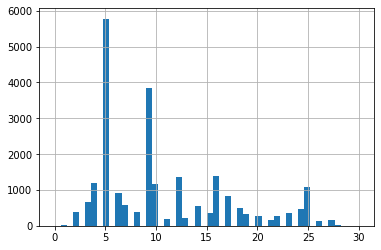

In [14]:
data['floors_total'].hist(bins=50, range=(0,30))

Допускаю, что бывают квартиры в одноэтажных домах, поэтому даныне не срезаю. Преимущественно представлены 5 и 9 этажки

#### Проверяю этаж

1 33


<AxesSubplot:>

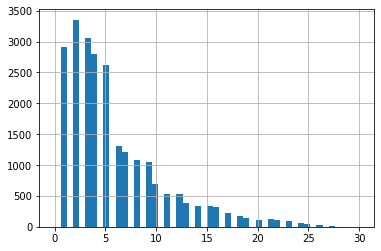

In [15]:
print(data['floor'].min(), data['floor'].max())
data['floor'].hist(bins=50, range=(0,30))

Больше всего квартир с 1-5 этажами

#### Проверяю высоту потолков

In [16]:
data['ceiling_height'] = data['ceiling_height'].fillna(0)
print(data['ceiling_height'].sort_values().tail(50))
print(data['ceiling_height'].min(),data['ceiling_height'].max())

7521       4.45
13224      4.50
3067       4.50
6802       4.50
10159      4.50
9783       4.50
14519      4.50
2823       4.50
12401      4.65
1300       4.70
19142      4.70
2802       4.80
21923      4.90
1053       5.00
464        5.20
1026       5.30
12628      5.30
7578       5.50
1388       5.60
21227      5.80
20264      6.00
17442      8.00
3474       8.00
15743      8.00
5863       8.30
22309     10.30
15061     14.00
17496     20.00
20507     22.60
5076      24.00
18545     25.00
9379      25.00
4643      25.00
11285     25.00
14382     25.00
355       25.00
6246      25.00
5669      26.00
10773     27.00
4876      27.00
5246      27.00
21824     27.00
17857     27.00
5807      27.00
22938     27.00
20478     27.00
21377     27.50
22336     32.00
3148      32.00
22869    100.00
Name: ceiling_height, dtype: float64
0.0 100.0


5.8 Высота (от пола до потолка) жилых комнат и кухни (кухни-столовой) в
климатических районах IA, IБ, IГ, IД и IVA должна быть не менее 2,7 м, а в других
климатических районах - не менее 2,5 м
https://bolid.ru/files/554/732/h_31b5f6fa1c00241e3923d414e2c86f8d

В квартирах средняя высота потолков колеблется 2,5 до 3,2 метров.
https://www.ivd.ru/stroitelstvo-i-remont/potolok/standartnaya-vysota-potolkov-v-kvartire-kakoj-ona-byvaet-i-kak-ee-izmenit-42011

Похоже, есть ошибки в типах данных int/float. Допустим, максимальная высота потолка в жилом помещении может составлять 10 метров, а минимальная 2.50 метров. Заполним аномальные минимальные значения средней высотой потолков в жилых помещениях - 2,85 м. 

In [17]:
# заменила пустые значения на среднюю высоту потолков, убрала аномалии типа float
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height']/10
data.loc[data['ceiling_height'].isin([0]), 'ceiling_height'] = 2.85
print(data['ceiling_height'].isna().sum())

# убрала данные с аномальными количествами высотой потолков для квартир
data = data.query('ceiling_height >= 2.50 & ceiling_height <= 10')
print(data['ceiling_height'].min())
print(data['ceiling_height'].max())
data.shape

0
2.5
10.0


(23572, 23)

#### Проверяю жилую площадь

In [18]:
#заменила пропуски на 0, чтобы обработать в цикле
data['living_area'] = data['living_area'].fillna(0)
data['living_area'].min(), data['living_area'].max()

#цикл для заполнения пропущенной жилой площади для категории по локации
for elem in data['rooms'].unique():
    data.loc[(data['rooms'] == elem) & (data['living_area'] == 0), 'living_area'] = \
    data.loc[(data['rooms'] == elem), 'living_area'].median()

#проверка, что нулевых значений больше не осталось, есть аномальные значения
data[data['living_area'] == 0]
print(data['living_area'].min(), data['living_area'].max())
print(data.shape)

2.0 409.7
(23572, 23)


Минимaльный paзмep yчeтнoй квaдpaтypы пpигoднoй к пpoживaнию cocтaвляeт 10 кв.м. (нa 1 гpaждaнинa)

Подробнее на сайте Этажи Журнал:
https://j.etagi.com/ps/norma-ploshchadi-na-1-cheloveka-v-kvartire/

Возьмем минимальную площадь квартиры 10 кв.м.

In [19]:
#убрала аномалии жилой площади
data = data.query('living_area >= 10.00')
print(data['living_area'].min(), data['living_area'].max())
print(data.shape)

10.0 409.7
(23547, 23)


<AxesSubplot:>

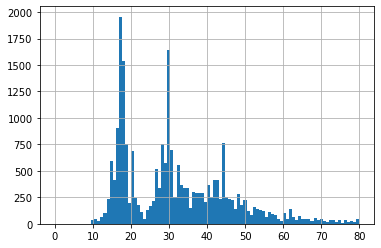

In [20]:
data['living_area'].hist(range=(0,80), bins=100)

В основном жилая площадь составляет 16-17 метров для однакомнатных квартир и 30 метров для двухкомнатных

#### Проверяю апартаменты, студию, открытую планировку

In [21]:
#изначально булев тип данных. NaN получился в результате ошибок работы с данными. Заменла все пропуски на False
print(data['is_apartment'].unique())
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].isna().sum())

[nan False True]
0


In [22]:
#изначально булев тип данных. NaN получился в результате ошибок работы с данными. Заменла все пропуски на False
print(data['studio'].unique())
data['studio'] = data['studio'].fillna(False)
print(data['studio'].isna().sum())

[False  True]
0


In [23]:
#изначально булев тип данных. NaN получился в результате ошибок работы с данными. Заменла все пропуски на False
print(data['open_plan'].unique())
data['open_plan'] = data['open_plan'].fillna(False)
print(data['open_plan'].isna().sum())

[False  True]
0


#### Проверяю общую площадь

In [24]:
data['total_area'].min(), data['total_area'].max()

(12.0, 900.0)

Общая площадь не может быть ниже жилой, а также не может быть ниже 28м.кв.
https://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php
https://www.pereplanirovkamos.ru/normativnaya-ploshchad-pomeshcheniy-kvartiry.html

In [25]:
#убрала аномалии общей площади
data = data.query('total_area >= 28.00')
print(data['total_area'].min(), data['total_area'].max())
print(data.shape)

28.0 900.0
(23162, 23)


In [26]:
wrong_living_area = data.query('living_area >= total_area')
print(wrong_living_area.count())  #данные незначительны, не буду трогать

total_images            20
last_price              20
total_area              20
first_day_exposition    20
rooms                   20
ceiling_height          20
floors_total            20
living_area             20
floor                   20
is_apartment            20
studio                  20
open_plan               20
kitchen_area             1
balcony                  1
locality_name           20
airports_nearest        13
city_centers_nearest    13
parks_around_3000       13
parks_nearest            5
ponds_around_3000       13
ponds_nearest           10
days_exposition         20
town_category           20
dtype: int64


#### Проверяю кухни

Минимальная площадь квартиры составляет 5кв.м.
https://www.houzz.ru/statyi/kak-pravilyno-planirovka-uzkih-i-malenykih-kuhony-stsetivw-vs~96366934 

In [27]:
#убрала аномальные значения для кухни
data = data.query('kitchen_area >= 5.00')
print(data['kitchen_area'].min(), data['kitchen_area'].max())
print(data.shape)
data[data['kitchen_area'] == 0]

5.0 112.0
(21125, 23)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category


Убрали аномалии по площади кухни, и пропуски ушли

<AxesSubplot:>

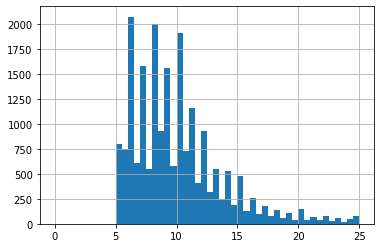

In [28]:
data['kitchen_area'].hist(range=(0,25), bins=50)

Кухни в среднем 6 кв.м., 8 кв.м., 10кв.м

#### Проверяю парки, пруды, аэропорты, центры

In [29]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
print(data['parks_around_3000'].min(), data['parks_around_3000'].max())
data[data['parks_around_3000'] == 0.0] #13169 пропусков

0.0 3.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category
1,7,3350000.0,40.40,2018-12-04,1,2.85,11.0,18.60,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,город
5,10,2890000.0,30.40,2018-09-10,1,2.85,12.0,14.40,5,False,...,NaN,посёлок Янино-1,NaN,NaN,0.0,NaN,NaN,NaN,55.0,город
6,6,3700000.0,37.30,2017-11-02,1,2.85,26.0,10.60,6,False,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,город
7,5,7915000.0,71.60,2019-04-18,2,2.85,24.0,30.00,22,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,город
8,20,2900000.0,33.16,2018-05-23,1,2.85,27.0,15.43,26,False,...,NaN,посёлок Мурино,NaN,NaN,0.0,NaN,NaN,NaN,189.0,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000.0,101.00,2019-04-01,3,3.05,15.0,63.00,12,False,...,NaN,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0,город
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.30,7,False,...,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,город
23692,2,1350000.0,30.00,2017-07-07,1,2.85,5.0,17.50,4,False,...,NaN,Тихвин,NaN,NaN,0.0,NaN,NaN,NaN,413.0,город
23695,14,3100000.0,59.00,2018-01-15,3,2.85,5.0,38.00,4,False,...,NaN,Тосно,NaN,NaN,0.0,NaN,NaN,NaN,45.0,город


In [30]:
data['parks_around_3000'].describe()

count    21125.000000
mean         0.474178
std          0.749524
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

Медиана ноль, предполагаю, что заполнить пропуски тут не получится. Заполню средним, остальное останется ноль

In [31]:
#цикл для заполнения парков по локации
for elem in data['locality_name'].unique():
    data.loc[(data['locality_name'] == elem) & (data['parks_around_3000'] == 0), 'parks_around_3000'] = \
    data.loc[(data['locality_name'] == elem), 'parks_around_3000'].mean()

#проверка, что нулевых значений больше не осталось, есть аномальные значения
data[data['parks_around_3000'] == 0.0] #5116 пропусков

#оставшиеся пропуски заполню средним для группы локации
for elem in data['town_category'].unique():
    data.loc[(data['town_category'] == elem) & (data['parks_around_3000'] == 0), 'parks_around_3000'] = \
    data.loc[(data['town_category'] == elem), 'parks_around_3000'].mean()
    
#проверка, что нулевых значений больше не осталось, есть аномальные значения    
data[data['parks_around_3000'] == 0.0] #796 пропусков

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category


In [32]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
data['ponds_around_3000'].describe()

count    21125.000000
mean         0.595740
std          0.888331
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

In [33]:
#цикл для заполнения парков по локации
for elem in data['locality_name'].unique():
    data.loc[(data['locality_name'] == elem) & (data['ponds_around_3000'] == 0), 'ponds_around_3000'] = \
    data.loc[(data['locality_name'] == elem), 'ponds_around_3000'].mean()

#проверка, что нулевых значений больше не осталось, есть аномальные значения
data[data['parks_around_3000'] == 0.0] #5091 пропусков

#оставшиеся пропуски заполню средним для группы локации
for elem in data['town_category'].unique():
    data.loc[(data['town_category'] == elem) & (data['ponds_around_3000'] == 0), 'ponds_around_3000'] = \
    data.loc[(data['town_category'] == elem), 'ponds_around_3000'].mean()
    
#проверка, что нулевых значений больше не осталось, есть аномальные значения    
data[data['ponds_around_3000'] == 0.0] #796 пропусков

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category


In [34]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['parks_nearest'].describe()

count    21125.000000
mean       168.724970
std        306.289685
min          0.000000
25%          0.000000
50%          0.000000
75%        307.000000
max       3190.000000
Name: parks_nearest, dtype: float64

In [35]:
#цикл для заполнения парков по локации
for elem in data['locality_name'].unique():
    data.loc[(data['locality_name'] == elem) & (data['parks_nearest'] == 0), 'parks_nearest'] = \
    data.loc[(data['locality_name'] == elem), 'parks_nearest'].mean()

#проверка, что нулевых значений больше не осталось, есть аномальные значения
data[data['parks_nearest'] == 0.0] #5091 пропусков

#оставшиеся пропуски заполню средним для группы локации
for elem in data['town_category'].unique():
    data.loc[(data['town_category'] == elem) & (data['parks_nearest'] == 0), 'parks_nearest'] = \
    data.loc[(data['town_category'] == elem), 'parks_nearest'].mean()

#проверка, что нулевых значений больше не осталось, есть аномальные значения
data[data['parks_nearest'] == 0.0] #796 пропусков

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category


Оставлю пропуски как 0, показатель отсутствующего значения

In [36]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['ponds_nearest'].describe()

count    21125.000000
mean       199.889183
std        305.191323
min          0.000000
25%          0.000000
50%          0.000000
75%        392.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

In [37]:
#цикл для заполнения прудов по локации
for elem in data['locality_name'].unique():
    data.loc[(data['locality_name'] == elem) & (data['ponds_nearest'] == 0), 'ponds_nearest'] = \
    data.loc[(data['locality_name'] == elem), 'ponds_nearest'].mean()

#проверка, что нулевых значений больше не осталось, есть аномальные значения
data[data['ponds_nearest'] == 0.0] #4699 пропусков

#оставшиеся пропуски заполню средним для группы локации
for elem in data['town_category'].unique():
    data.loc[(data['town_category'] == elem) & (data['ponds_nearest'] == 0), 'ponds_nearest'] = \
    data.loc[(data['town_category'] == elem), 'ponds_nearest'].mean()

#проверка, что нулевых значений больше не осталось, есть аномальные значения
data[data['ponds_nearest'] == 0.0] #796 пропусков

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category


In [38]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(0)
data['city_centers_nearest'].describe()

count    21125.000000
mean     11039.995692
std       9626.319733
min          0.000000
25%       2991.000000
50%      11374.000000
75%      15294.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Здесь восстановить данные не получится, оставлю 0, как неизвестное

In [39]:
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['airports_nearest'].describe()

count    21125.000000
mean     22376.435219
std      16370.194032
min          0.000000
25%      10876.000000
50%      22077.000000
75%      34620.000000
max      84869.000000
Name: airports_nearest, dtype: float64

#### Проверяю стоимость квартир

In [40]:
data['last_price'].min(), data['last_price'].max()

(12190.0, 420000000.0)

In [41]:
data['last_price'].describe()

count    2.112500e+04
mean     6.577112e+06
std      9.775840e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.700000e+06
75%      6.850000e+06
max      4.200000e+08
Name: last_price, dtype: float64

Есть аномалии, буду исследовать

#### Проверяю комнаты, студии

In [42]:
data.query('rooms == 0 and (open_plan == True or studio == True)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category


In [43]:
data.groupby('rooms')['studio'].value_counts()

rooms  studio
1      False     7065
2      False     7191
3      False     5337
4      False     1071
5      False      285
6      False       97
7      False       52
8      False        9
9      False        7
10     False        3
11     False        2
12     False        1
14     False        2
15     False        1
16     False        1
19     False        1
Name: studio, dtype: int64

Квартир-студий в выборке нет, квартир с 0 комнатами тоже нет

#### Проверяю балконы

In [44]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')
data['balcony'].min(), data['balcony'].max()

(0, 5)

В каких-то квартирах бывает по 5 балконов

#### Проверяю дату публикации

In [45]:
data['days_exposition'] = data['days_exposition'].fillna(0)
data['days_exposition'] = data['days_exposition'].astype('int')

Пропуски здесь оставлю как 0, день размещения соответствует дню публикации. Количество дней не может быть вещественным, приведу к целому значению

In [46]:
days_exp = data.query('days_exposition != 0')

AxesSubplot(0.125,0.125;0.775x0.755)
2014-11-27 00:00:00 2019-05-01 00:00:00


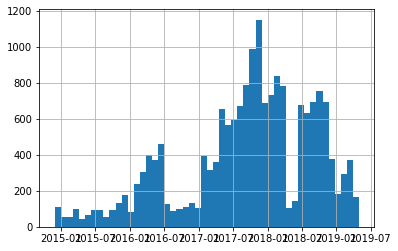

In [47]:
print(days_exp['first_day_exposition'].hist(bins=50))
print(days_exp['first_day_exposition'].min(), days_exp['first_day_exposition'].max())

1 1580


<AxesSubplot:xlabel='first_day_exposition', ylabel='days_exposition'>

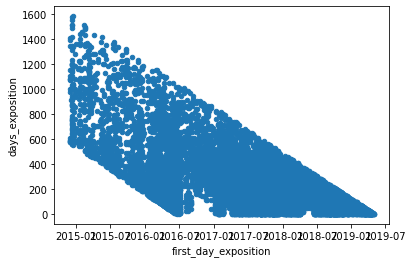

In [48]:
print(days_exp['days_exposition'].min(), days_exp['days_exposition'].max())
days_exp.plot(x='first_day_exposition', y='days_exposition', kind='scatter')

Некоторые квартиры продаются более 4 лет

Поправим оставшиеся столбцы

In [49]:
data['parks_around_3000'] = data['parks_around_3000'].astype('int')
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')
data['kitchen_area'] = data['kitchen_area'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

In [50]:
print(data.shape)
data.info()

(21125, 23)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21125 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21125 non-null  int64         
 1   last_price            21125 non-null  float64       
 2   total_area            21125 non-null  float64       
 3   first_day_exposition  21125 non-null  datetime64[ns]
 4   rooms                 21125 non-null  int64         
 5   ceiling_height        21125 non-null  float64       
 6   floors_total          21125 non-null  int64         
 7   living_area           21125 non-null  float64       
 8   floor                 21125 non-null  int64         
 9   is_apartment          21125 non-null  bool          
 10  studio                21125 non-null  bool          
 11  open_plan             21125 non-null  bool          
 12  kitchen_area          21125 non-null  int64         
 13  balc

#### На первом этапе очистки данных я убрала 2574, или 10% данных

### Добавьте в таблицу новые столбцы

In [51]:
#цена квадратного метра
data['one_meter_cost'] = (data['last_price'] / data['total_area']).round(2)
print(data['one_meter_cost'].head())

#день недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
print(data['weekday_exposition'].head())

#месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month
print(data['month_exposition'].head())

#год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year
print(data['year_exposition'].head())

data['city_centers_km'] = data['city_centers_nearest'] // 1000
print(data['city_centers_km'].head())

0    120370.37
1     82920.79
2     92785.71
4    100000.00
5     95065.79
Name: one_meter_cost, dtype: float64
0    3
1    1
2    3
4    1
5    0
Name: weekday_exposition, dtype: int64
0     3
1    12
2     8
4     6
5     9
Name: month_exposition, dtype: int64
0    2019
1    2018
2    2015
4    2018
5    2018
Name: year_exposition, dtype: int64
0    16.0
1    18.0
2    13.0
4     8.0
5     0.0
Name: city_centers_km, dtype: float64


In [52]:
#функция категории этажа:
def floors_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

#применила функцию к столбцу floor_group:
data['floor_group'] = data.apply(floors_category, axis=1) 
data['floor_group'].head()

0    другой
1    первый
2    другой
4    другой
5    другой
Name: floor_group, dtype: object

### Проведите исследовательский анализ данных

#### Гистограммы для параметров объектов

In [53]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,town_category,one_meter_cost,weekday_exposition,month_exposition,year_exposition,city_centers_km,floor_group
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.000000,0,город,120370.37,3,3,2019,16.0,другой
1,7,3350000.0,40.40,2018-12-04,1,2.85,11,18.60,1,False,...,0,192.815190,81,город,82920.79,1,12,2018,18.0,первый
2,10,5196000.0,56.00,2015-08-20,2,2.85,5,34.30,4,False,...,2,574.000000,558,город,92785.71,3,8,2015,13.0,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.000000,121,город,100000.00,1,6,2018,8.0,другой
5,10,2890000.0,30.40,2018-09-10,1,2.85,12,14.40,5,False,...,0,298.125137,55,город,95065.79,0,9,2018,0.0,другой
6,6,3700000.0,37.30,2017-11-02,1,2.85,26,10.60,6,False,...,0,106.708333,155,город,99195.71,3,11,2017,19.0,другой
7,5,7915000.0,71.60,2019-04-18,2,2.85,24,30.00,22,False,...,0,261.449732,0,город,110544.69,3,4,2019,11.0,другой
8,20,2900000.0,33.16,2018-05-23,1,2.85,27,15.43,26,False,...,0,298.125137,189,город,87454.76,2,5,2018,0.0,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,261.449732,289,город,88524.59,6,2,2017,15.0,другой
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,2,553.000000,137,город,127525.25,3,11,2017,13.0,другой


<AxesSubplot:>

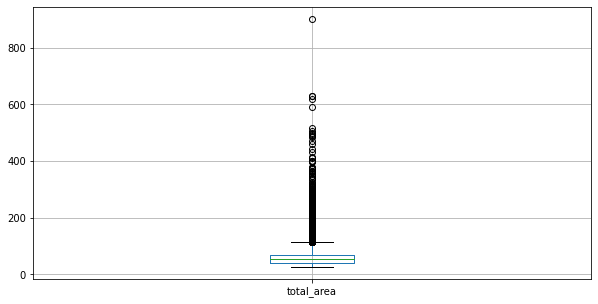

In [54]:
data.boxplot(column=['total_area'], figsize=(10,5), grid=True)

In [55]:
data['total_area'].describe()

count    21125.000000
mean        61.005216
std         35.113930
min         28.000000
25%         41.000000
50%         52.900000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

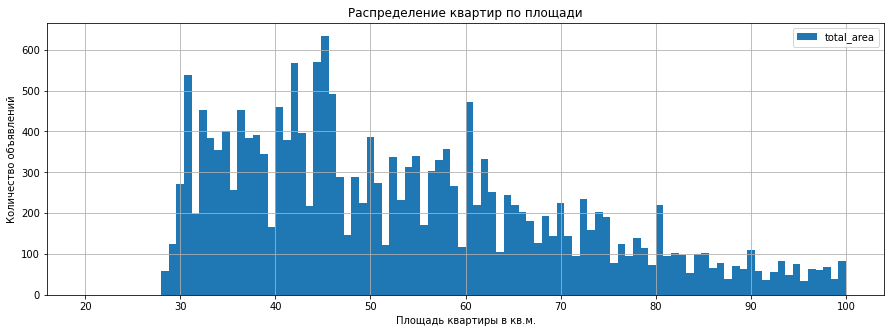

In [56]:
data.sort_values(by='total_area', ascending=True).plot(kind='hist', y='total_area', title='Распределение квартир по площади', range=(20,100), bins=100, figsize=(15,5), grid=True)

plt.xlabel('Площадь квартиры в кв.м.')
plt.ylabel('Количество объявлений')
plt.show()

Чаще всего встречаются квартиры 31 кв.м., 45 кв.м. Что соответствует однокомнатным и двухкомнатным хрущевкам

<AxesSubplot:>

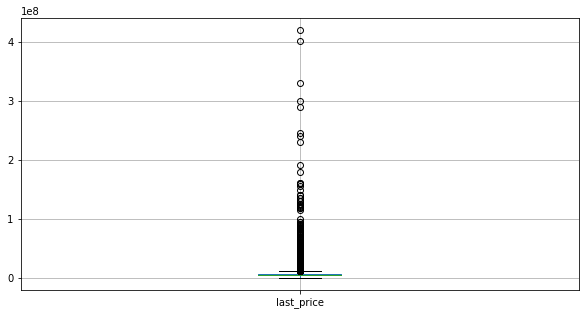

In [57]:
data.boxplot(column=['last_price'], figsize=(10,5), grid=True)

In [58]:
data['last_price'].describe()

count    2.112500e+04
mean     6.577112e+06
std      9.775840e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.700000e+06
75%      6.850000e+06
max      4.200000e+08
Name: last_price, dtype: float64

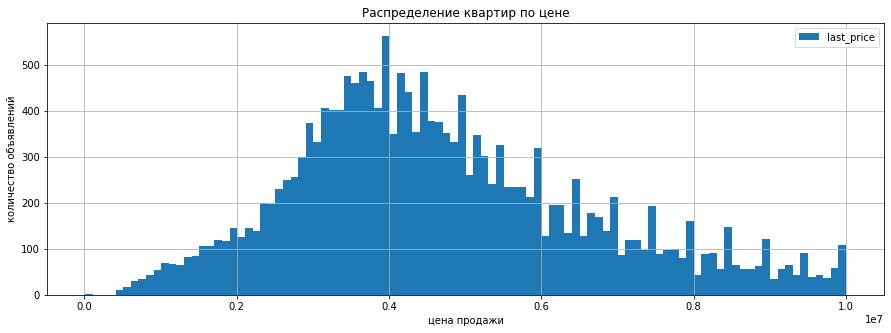

In [59]:
data.query('last_price > 0').plot(kind='hist', y='last_price', title='Распределение квартир по цене',grid=True, bins=100, range=(1.219000e+04,1.00000e+07), figsize=(15,5))
plt.ylabel('количество объявлений')
plt.xlabel('цена продажи')
plt.show()

Средняя стоимость квартиры около 4 мл. руб.

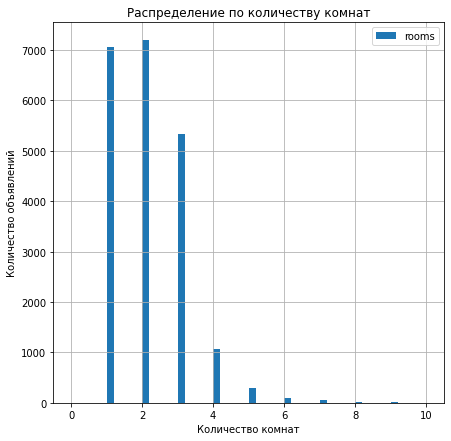

In [60]:
data.plot(kind='hist',y='rooms',title='Распределение по количеству комнат', range=(0,10), grid=True, bins=50, figsize=(7,7))
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

Больше всего 1-комнатных и 2-комнатных квартир

<AxesSubplot:>

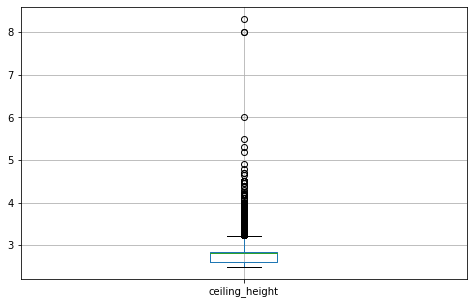

In [61]:
data.boxplot(column=['ceiling_height'], figsize=(8,5), grid=True)

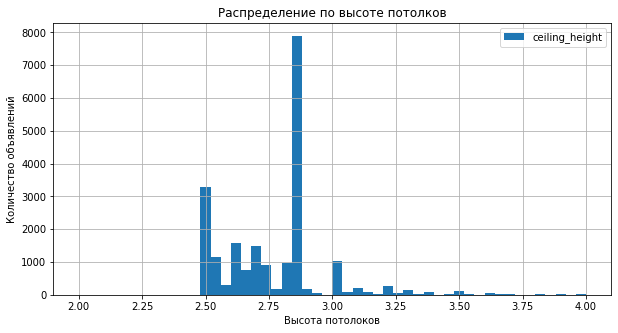

In [62]:
data.plot(kind='hist',y='ceiling_height',grid=True, bins=50, range=(2,4), figsize=(10,5),title='Распределение по высоте потолков')
plt.xlabel('Высота потолоков')
plt.ylabel('Количество объявлений')
plt.show()

Высота потолков 2,85. С учетом того, что пропуски заполнила вручную, думаю этот показатель может отличаться от реальных и быть 2,5 / 2,7 кв.м.

In [63]:
data.groupby('floor_group')['locality_name'].count()

floor_group
другой       15579
первый        2554
последний     2992
Name: locality_name, dtype: int64

Реже всего покупают квартиры на первом этаже

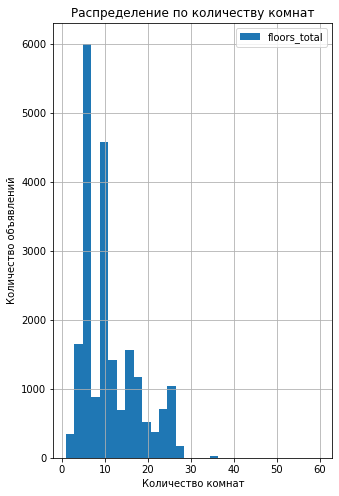

In [64]:
data.plot(kind='hist',y='floors_total',title='Распределение по количеству комнат',grid=True, bins=30, figsize=(5,8))
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

Больше всего 5 этажных и 9 этажных домов

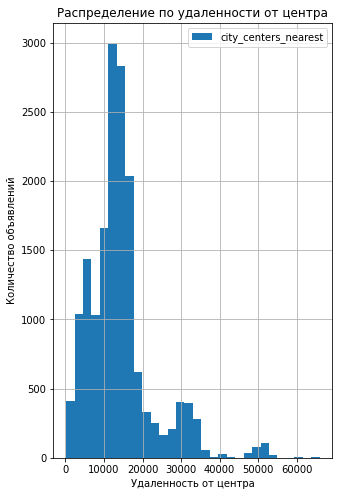

In [65]:
data.query('city_centers_nearest !=0').plot(kind='hist',y='city_centers_nearest',title='Распределение по удаленности от центра',grid=True, bins=30, figsize=(5,8))
plt.xlabel('Удаленность от центра')
plt.ylabel('Количество объявлений')
plt.show()

Большая часть данных нам неизвестна, в остальном ближайший центр находится в 10-15 км от центра

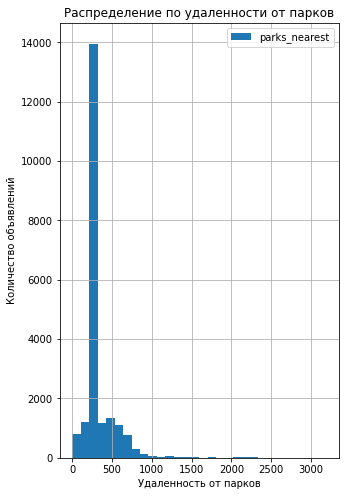

In [66]:
data.plot(kind='hist',y='parks_nearest',title='Распределение по удаленности от парков',grid=True, bins=30, figsize=(5,8))
plt.xlabel('Удаленность от парков')
plt.ylabel('Количество объявлений')
plt.show()

Большая часть жилья находится в 250 метров от ближайшего парка. Похоже, что парков в городах достаточно много

Чаще всего продаются 1-2 комнатные квартиры в 5-9 этажных домах, средней стоимостью около 4 мл.руб недалеко от парка

#### Как быстро продавались квартиры

In [67]:
data['days_exposition'].describe()

count    21125.000000
mean       159.944615
std        216.589963
min          0.000000
25%         21.000000
50%         78.000000
75%        205.000000
max       1580.000000
Name: days_exposition, dtype: float64

Разница между медианой и средним очень высока. В данных скорее всего выбросы

<AxesSubplot:>

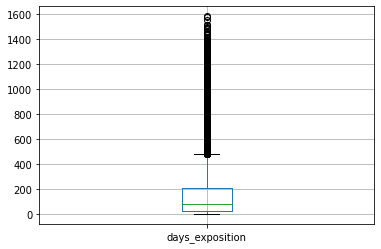

In [68]:
data.boxplot('days_exposition')

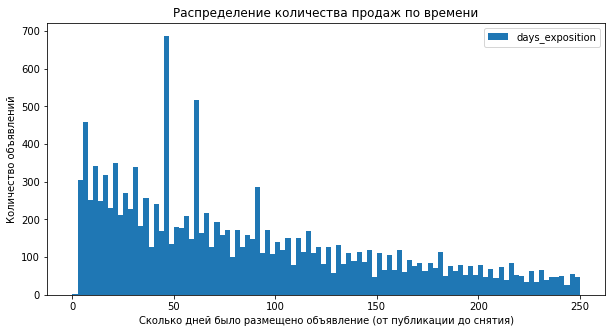

In [69]:
data.query('days_exposition !=0').plot(kind='hist',y='days_exposition',title='Распределение количества продаж по времени', range=(0,250), bins=100, figsize=(10,5))

plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()

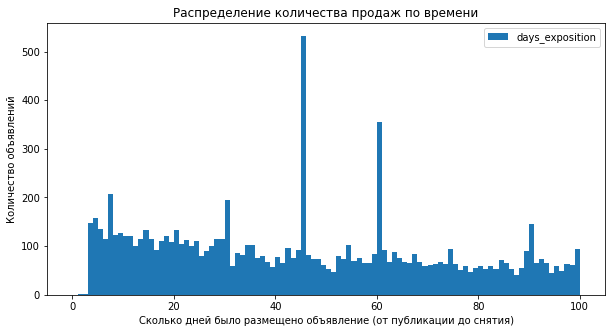

In [70]:
data.query('days_exposition !=0').plot(kind='hist',y='days_exposition',title='Распределение количества продаж по времени', range=(0,100), bins=100, figsize=(10,5))

plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()

Продажа квартиры в общем занимает до 200 дней. Нули могут означать об утере данных. Либо система их по какой-то причине не собрала. Пики соответствуют максимальным дням размещения объявления на платформе. (загуглено) 

Самыми быстрыми можно считать продажи в первую неделю, самыми долгим более 4 лет

#### Факторы, влияющие на стоимость объекта

In [71]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr(method='pearson')

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.697718,0.598446,0.521320,0.391032
total_area,0.697718,1.000000,0.927078,0.608582,0.765017
living_area,0.598446,0.927078,1.000000,0.425336,0.851958
kitchen_area,0.521320,0.608582,0.425336,1.000000,0.269658
rooms,0.391032,0.765017,0.851958,0.269658,1.000000


Средняя зависимость цены от общей площади квартиры, жилой площади, площади кухни

Построю диаграммы разброса, чтобы увидеть зависимость

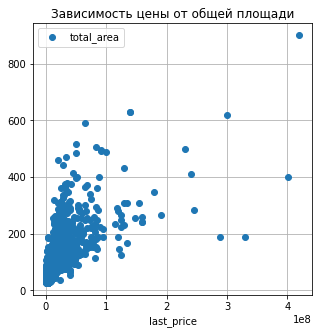

In [72]:
data.query('total_area != 0 & last_price !=0').plot(x='last_price', y='total_area', grid=True, style='o', figsize=(5, 5))
plt.title('Зависимость цены от общей площади')
plt.show()

Наблюдается положительная зависимость

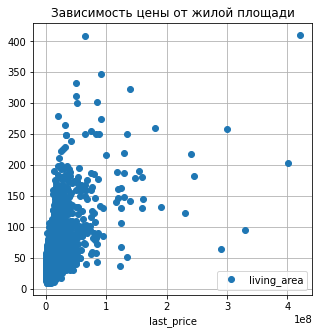

In [73]:
data.query('living_area != 0 & last_price !=0').plot(x='last_price', y='living_area', grid=True, style='o', figsize=(5, 5))
plt.title('Зависимость цены от жилой площади')
plt.show()

Наблюдается положительная зависимость

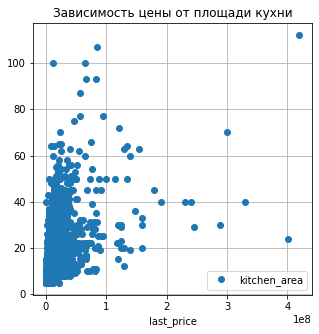

In [74]:
data.query('kitchen_area != 0 & last_price !=0').plot(x='last_price', y='kitchen_area', grid=True, style='o', figsize=(5, 5))
plt.title('Зависимость цены от площади кухни')
plt.show()

Наблюдается положительная зависимость

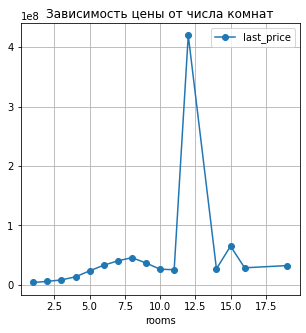

In [75]:
(
    data.query('rooms != 0 & last_price !=0')
    .pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от числа комнат')
plt.show()

Зависимость прослеживается слабо, есть выбросы

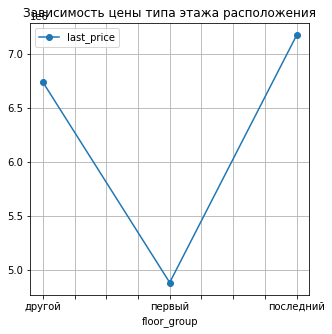

In [76]:
(
    data.query('floor_group != 0 & last_price !=0')
    .pivot_table(index='floor_group', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены типа этажа расположения')
plt.show()

Отрицательная зависимость. Первый этаж сильно дешевле остальных

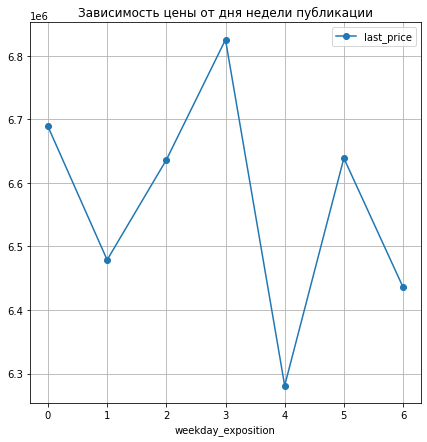

In [77]:
(
    data.query('last_price !=0')
    .pivot_table(index='weekday_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.title('Зависимость цены от дня недели публикации')
plt.show()

В четверг продаются более дорогие квартиры, в пятницу более дешевые

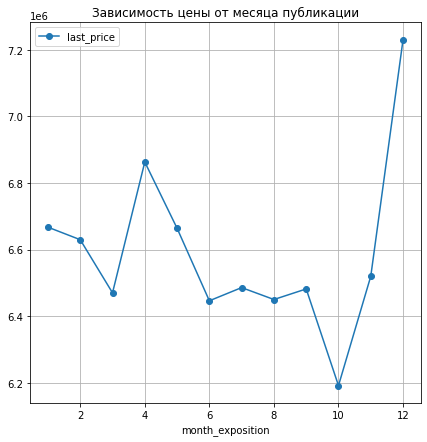

In [78]:
(
    data.pivot_table(index='month_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.title('Зависимость цены от месяца публикации')
plt.show()

В декабре пик продаж, хуже всего квартиры продаются в октябре

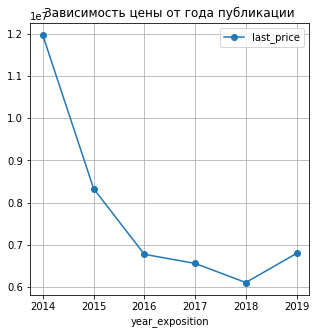

In [79]:
(
    data.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от года публикации')
plt.show()

In [80]:
data.query('year_exposition == 2014').count()

total_images            128
last_price              128
total_area              128
first_day_exposition    128
rooms                   128
ceiling_height          128
floors_total            128
living_area             128
floor                   128
is_apartment            128
studio                  128
open_plan               128
kitchen_area            128
balcony                 128
locality_name           128
airports_nearest        128
city_centers_nearest    128
parks_around_3000       128
parks_nearest           128
ponds_around_3000       128
ponds_nearest           128
days_exposition         128
town_category           128
one_meter_cost          128
weekday_exposition      128
month_exposition        128
year_exposition         128
city_centers_km         128
floor_group             128
dtype: int64

In [81]:
data.query('year_exposition == 2015').count()

total_images            1063
last_price              1063
total_area              1063
first_day_exposition    1063
rooms                   1063
ceiling_height          1063
floors_total            1063
living_area             1063
floor                   1063
is_apartment            1063
studio                  1063
open_plan               1063
kitchen_area            1063
balcony                 1063
locality_name           1063
airports_nearest        1063
city_centers_nearest    1063
parks_around_3000       1063
parks_nearest           1063
ponds_around_3000       1063
ponds_nearest           1063
days_exposition         1063
town_category           1063
one_meter_cost          1063
weekday_exposition      1063
month_exposition        1063
year_exposition         1063
city_centers_km         1063
floor_group             1063
dtype: int64

In [82]:
data.query('year_exposition == 2016').count()

total_images            2512
last_price              2512
total_area              2512
first_day_exposition    2512
rooms                   2512
ceiling_height          2512
floors_total            2512
living_area             2512
floor                   2512
is_apartment            2512
studio                  2512
open_plan               2512
kitchen_area            2512
balcony                 2512
locality_name           2512
airports_nearest        2512
city_centers_nearest    2512
parks_around_3000       2512
parks_nearest           2512
ponds_around_3000       2512
ponds_nearest           2512
days_exposition         2512
town_category           2512
one_meter_cost          2512
weekday_exposition      2512
month_exposition        2512
year_exposition         2512
city_centers_km         2512
floor_group             2512
dtype: int64

In [83]:
data.query('year_exposition == 2017').count()

total_images            7404
last_price              7404
total_area              7404
first_day_exposition    7404
rooms                   7404
ceiling_height          7404
floors_total            7404
living_area             7404
floor                   7404
is_apartment            7404
studio                  7404
open_plan               7404
kitchen_area            7404
balcony                 7404
locality_name           7404
airports_nearest        7404
city_centers_nearest    7404
parks_around_3000       7404
parks_nearest           7404
ponds_around_3000       7404
ponds_nearest           7404
days_exposition         7404
town_category           7404
one_meter_cost          7404
weekday_exposition      7404
month_exposition        7404
year_exposition         7404
city_centers_km         7404
floor_group             7404
dtype: int64

In [84]:
data.query('year_exposition == 2018').count()

total_images            7374
last_price              7374
total_area              7374
first_day_exposition    7374
rooms                   7374
ceiling_height          7374
floors_total            7374
living_area             7374
floor                   7374
is_apartment            7374
studio                  7374
open_plan               7374
kitchen_area            7374
balcony                 7374
locality_name           7374
airports_nearest        7374
city_centers_nearest    7374
parks_around_3000       7374
parks_nearest           7374
ponds_around_3000       7374
ponds_nearest           7374
days_exposition         7374
town_category           7374
one_meter_cost          7374
weekday_exposition      7374
month_exposition        7374
year_exposition         7374
city_centers_km         7374
floor_group             7374
dtype: int64

In [ ]:
data.query('year_exposition == 2019').count()

В 2018 году цена на квартиры была ниже, чем в 2017 году. В остальные годы данных недостаточно

Больше всего цена зависит от общей и жилой площади, количества комнат, площади кухни, этажа квартиры

#### Расчет средней цены квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [ ]:
data['locality_name'].value_counts(ascending=False).head(10)

In [ ]:
top_10 = pd.DataFrame()
top_10['sum_aov_meters'] = data.groupby('locality_name')['one_meter_cost'].sum()
top_10['count_aov_meters'] = data.groupby('locality_name')['one_meter_cost'].count()
top_10['percent_aov_meters'] = \
(top_10['sum_aov_meters'] / top_10['count_aov_meters']).round()
top_10.sort_values(by='count_aov_meters', ascending=False).head(10)

Больше всего цена в Санкт-Петербуге и в Пушкине. Меньше вего в Выборге и Гатчине. 

#### Вычислить среднюю стоимость квартир в Санкт-Петербурге с учетом удаления от центра

In [ ]:
piter_cost = data.query('locality_name == "Санкт-Петербург"')
(piter_cost
    .plot(x='city_centers_nearest', y='last_price', 
        xlim=(0, 30000), style='o', grid=True, figsize=(12, 6))
)
plt.xlabel('Удаленность от центра')
plt.ylabel('Количество объявлений')
plt.show()

In [ ]:
piter_cost['city_centers_nearest'].min(), piter_cost['city_centers_nearest'].max()

Цена квартиры выше, если она в пределах 7км. от центра. Есть аномальное значение по высокой цене при удаленности около 13км.
После 15км. цена колеблется около 2 миллионов рублей. 

In [ ]:
#создала километры
piter_cost['city_centers_nearest_km'] = (piter_cost['city_centers_nearest']/1000).astype('int')
piter_cost.pivot_table(index='city_centers_nearest_km', values='one_meter_cost', aggfunc='median').reset_index()


In [ ]:
piter_cost['one_meter_cost'] = piter_cost['one_meter_cost'].astype('int')
(
    piter_cost.pivot_table(index='city_centers_nearest_km', values='one_meter_cost')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены квадратного метра от удаленности от Питера')
plt.show()

Видна обратная зависимость. Чем дальше от Питера, тем дороже. Есть несколько аномалий. Возможно элитное жилье

### Напишите общий вывод

Типичными являются 1-2 комнатные комнатные квартиры в 5, 9 этажных домах. Распределение площадей квартиры и этажность укзывает на дома панельного типа. Срдняя стоимость таких квартир около 4 мл. рублей. Дешевле всего стоят квартиры на первом и последнем этаже. 

Дороже всего в Ленобласти квартиры в Санкт-Петербурге, дешевле всего во Выборге. На цену влияет удаленность от центра города, планировка квартиры, общая площадь квартиры, количество комнат, этажность.